## 3-2. How to use Qiskit and IBM Q Experience
IBM Q Experience is the world's first quantum computer released on the cloud by IBM on May 24, 2016 [[1]](https://quantumexperience.ng.bluemix.net/qx/experience). In this section, you will learn how to use IBM Q Experience and IBM's framework for quantum computation [Qiskit](https://qiskit.org).


### Prepare an execution environment for IBM Q Experience
#### Account registration
1. first, create an account by clicking the Sign In button in the upper right corner of the IBM Q Experience web page [[1]](https://quantumexperience.ng.bluemix.net/qx/experience). 
2. You will be asked for an e-mail address and password or an account for an external service. Click the Sign Up button under Sign In button.
3. Fill in the required information and click the Sign Up button. 
4. An e-mail will be sent to your registered e-mail address. Click the link in the e-mail. Then you will see the registration completion screen in a new window, and you can log in from the next time.

#### Obtaining the API
 Now that you have registered for IBM Q Experience, the next step is to learn how to obtain the IBM Q Experience API necessary to access the actual IBM Q Experience device (a real quantum computer). 

1. after logging in, you will get a pop-up window saying "Welcome to Experience!". Close the window.
2. click the icon in the upper right corner of the screen â†’ "My Account" to see your registered account information 
3. click "Advanced" among "Account," "Community," and "Advanced" on the upper right corner of the screen. 
4. The "API Token" field is set to "undefined," click the "Regenerate" button to generate the API. Click the "Copy this token" button next to it to paste the API into the clipboard.

Incidentally, you can also use the GUI on the IBM Q Experience web page [[1]](https://quantumexperience.ng.bluemix.net/qx/experience) to generate and run circuits by drag and drop, or the Jupyter Notebook (called Qiskit Notebooks) can also be created and executed on the web page.

### Prepare a Qiskit execution environment
Qiskit can be installed via pip. If you use the command line in your PC (command prompt on Windows, terminal on Mac), type `pip install qiskit` in the command line to run it. If you are using Google Colaboratory, you can use it by executing `!pip install qiskit` in the following cell.

In [ ]:
!pip install qiskit

### Using Qiskit
Qiskit is a Python framework, so the syntax is the same as Python. Before that, let's save the information necessary to use Qiskit in your local environment (you only need to do this step once for each environment).

In [ ]:
## Put the token obtained above into "MY_API_TOKEN".
from qiskit import IBMQ
IBMQ.save_account('MY_API_TOKEN')

In this section, we will learn how to generate a Bell state pair, $|\Psi^{+}\rangle=\frac{|00\rangle + |11\rangle}{\sqrt{2}}$, as an example.

In [2]:
##Import necessary modules
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
from qiskit.qasm import pi
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import numpy as np

In [3]:
# Load your account information. (You need to run IBMQ.save_account beforehand. If you want to use multiple accounts, do it here)
provider = IBMQ.load_account()

# See what backends are available for your account.
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

Except for `'ibmq_qasm_simulator'` (32-qubit simulator), available resource is a real 5-qubit and 14-qubit quantum computer (you can find the details on the screen after login to IBM Q Experience). The following command will tell you which one is the most available and easy to throw a job on.

In [4]:
from qiskit.providers.ibmq import least_busy
backend_lb = least_busy(provider.backends(simulator=False, operational=True))
print("Least busy backend: ", backend_lb)

Least busy backend:  ibmqx2


It seems that `ibmqx2` is the least busy one, so let's use it as the real machine. First, let's run the quantum circuit on the simulator.

{'00': 2089, '11': 2007}


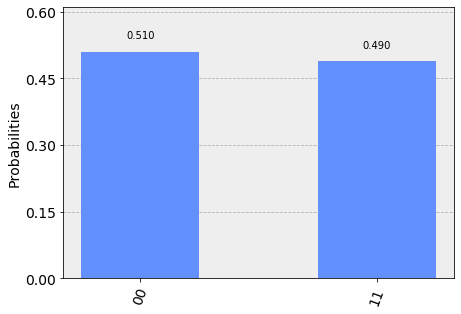

In [5]:
#Generate a quantum register q.
q = QuantumRegister(2)

#Generate a quantum register c.
c = ClassicalRegister(2)

#Generate a quantum circuit between quantum register q and classical register c.
qc = QuantumCircuit(q, c)

#apply H-gate to the first qubit.
qc.h(q[0])

#Apply CNOT gate to the 1-2th qubit. (The first qubit is the control qubit, the second qubit is the target qubit)
qc.cx(q[0],q[1])

#pass the measured value of the first qubit to the first classical bit and the measured value of the second qubit to the second classical bit.
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

#local simulator and least busy backend
backend_sim = Aer.get_backend("qasm_simulator")

#run the quantum circuit qc 4096 times with the specified backend (backend_sim).
result = execute(qc, backend_sim, shots=4096).result()

#Output the results.
print(result.get_counts(qc))

#Draw a histogram of the results.
plot_histogram(result.get_counts(qc))

Since the generated state is $\frac{|00\rangle + |11\rangle}{\sqrt{2}}$, we can see that the probability of getting $|00\rangle$ and $|11\rangle$ are both close to 50% as shown in the formula. Next, let's look at the results from the actual machine. Note that it takes a very long time to obtain the results of the experiment on the actual machine.

{'00': 1844, '11': 2041, '01': 107, '10': 104}


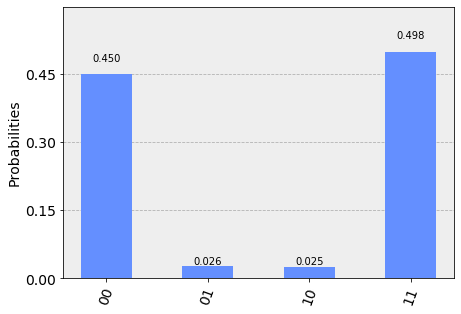

In [6]:
#Select the backend that was least busy
backend_sim = backend_lb

#Execute quantum circuit qc 4096 times with the specified backend (backend_sim).
result = execute(qc, backend_sim, shots=4096).result()

#Output the results.
print(result.get_counts(qc))

#Draw a histogram of the results.
plot_histogram(result.get_counts(qc))

The results from the actual machine show that $|01\rangle$ and $|10\rangle$, which cannot be obtained theoretically, are obtained. This is due to an error in the calculation process. This result clearly shows that today's quantum computers are called NISQ devices (medium-scale quantum computers that allow the generation of noise).

### Reference

[1] https://quantumexperience.ng.bluemix.net/qx/experience [online] ( 2019-02-13)